In [1]:
from src.config import config

In [2]:
from src.input_pipeline import create_dataloaders

train_loader, val_loader = create_dataloaders()

In [3]:
from src.models import MPCTransformer
model_config = config['model']

model = MPCTransformer(**model_config)

/home/jannik/miniconda3/lib/python3.10/site-packages/jax/_src/api_util.py:190: SyntaxWarning: Jitted function has static_argnums=(0, 1, 9), but only accepts 8 positional arguments. This warning will be replaced by an error after 2022-08-20 at the earliest.
  warnings.warn(f"Jitted function has {argnums_name}={argnums}, "


In [4]:
from src.train import train

num_epochs = 50

state, metrics_history = train(model, num_epochs, train_loader, val_loader)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
100%|██████████| 64/64 [00:04<00:00, 15.79it/s, val_loss=0.008367277] 


Epoch: 0, Loss: 0.009923194535076618, Loss: 0.00836727675050497, 


100%|██████████| 64/64 [00:04<00:00, 14.43it/s, val_loss=0.0070396964]


Epoch: 1, Loss: 0.0071375747211277485, Loss: 0.00703969644382596, 


100%|██████████| 64/64 [00:04<00:00, 15.31it/s, val_loss=0.006335999] 


Epoch: 2, Loss: 0.006346951704472303, Loss: 0.006335998885333538, 


100%|██████████| 64/64 [00:04<00:00, 14.29it/s, val_loss=0.0057847346]


Epoch: 3, Loss: 0.005836628843098879, Loss: 0.00578473461791873, 


100%|██████████| 64/64 [00:04<00:00, 15.96it/s, val_loss=0.005307721] 


Epoch: 4, Loss: 0.0054176789708435535, Loss: 0.005307720974087715, 


100%|██████████| 64/64 [00:04<00:00, 14.63it/s, val_loss=0.0049153534]


Epoch: 5, Loss: 0.005066044628620148, Loss: 0.004915353376418352, 


100%|██████████| 64/64 [00:03<00:00, 16.42it/s, val_loss=0.004603392] 


Epoch: 6, Loss: 0.004785483703017235, Loss: 0.004603391978889704, 


100%|██████████| 64/64 [00:04<00:00, 15.59it/s, val_loss=0.0043519386]


Epoch: 7, Loss: 0.004572148900479078, Loss: 0.004351938609033823, 


100%|██████████| 64/64 [00:03<00:00, 16.87it/s, val_loss=0.0041544596]


Epoch: 8, Loss: 0.004411665257066488, Loss: 0.004154459573328495, 


100%|██████████| 64/64 [00:04<00:00, 15.49it/s, val_loss=0.004009165] 


Epoch: 9, Loss: 0.004286674782633781, Loss: 0.004009164869785309, 


100%|██████████| 64/64 [00:04<00:00, 13.94it/s, val_loss=0.003865999] 


Epoch: 10, Loss: 0.004171046894043684, Loss: 0.00386599893681705, 


100%|██████████| 64/64 [00:04<00:00, 15.22it/s, val_loss=0.002804434] 


Epoch: 11, Loss: 0.003657410154119134, Loss: 0.0028044339269399643, 


100%|██████████| 64/64 [00:03<00:00, 16.62it/s, val_loss=0.0024153716]


Epoch: 12, Loss: 0.0024286527186632156, Loss: 0.0024153715930879116, 


100%|██████████| 64/64 [00:03<00:00, 17.88it/s, val_loss=0.0022139587]


Epoch: 13, Loss: 0.002172282664105296, Loss: 0.002213958650827408, 


100%|██████████| 64/64 [00:03<00:00, 16.41it/s, val_loss=0.002089707] 


Epoch: 14, Loss: 0.0019915641751140356, Loss: 0.0020897069480270147, 


100%|██████████| 64/64 [00:03<00:00, 19.74it/s, val_loss=0.0018982226]


Epoch: 15, Loss: 0.0018720556981861591, Loss: 0.001898222602903843, 


100%|██████████| 64/64 [00:03<00:00, 18.35it/s, val_loss=0.001782644] 


Epoch: 16, Loss: 0.0017282676417380571, Loss: 0.0017826439579948783, 


100%|██████████| 64/64 [00:03<00:00, 17.05it/s, val_loss=0.0016766536]


Epoch: 17, Loss: 0.0016158780781552196, Loss: 0.0016766536282375455, 


100%|██████████| 64/64 [00:03<00:00, 18.34it/s, val_loss=0.0015887149]


Epoch: 18, Loss: 0.0015232576988637447, Loss: 0.0015887148911133409, 


100%|██████████| 64/64 [00:03<00:00, 19.77it/s, val_loss=0.0015137702]

Epoch: 19, Loss: 0.0014460950624197721, Loss: 0.001513770199380815, 


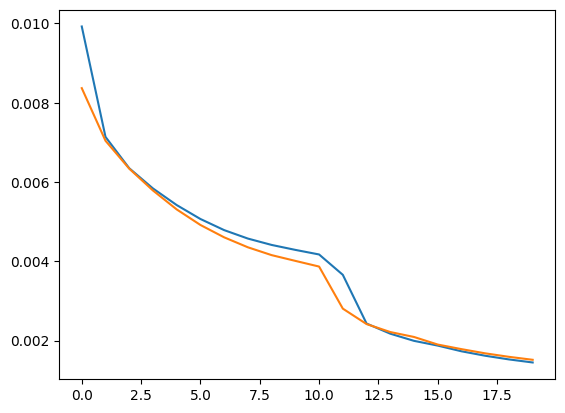

In [5]:
import matplotlib.pyplot as plt

plt.plot(metrics_history['train_loss'], label='train_loss')
plt.plot(metrics_history['val_loss'], label='val_loss')
plt.show()

In [13]:
import torch
from src.input_pipeline import create_dataset
from tqdm import tqdm

dataset = create_dataset()

In [18]:
commands ={'target': [], 'pred': []}

for i in tqdm(range(len(dataset))[:100]):
  grid, u_target = dataset.__getitem__(i)
  grid = torch.unsqueeze(grid, 0).numpy()
  
  u_pred = model.apply({'params': state.params}, grid, train=False)
  
  commands['target'].append(u_target[0,0])
  commands['pred'].append(u_pred[0,0,0])

100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


{'target': [tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.4000), tensor(0.3810), tensor(0.3582), tensor(0.3316), tensor(0.3316), tensor(0.3354), tensor(0.3316), tensor(0.3354), tensor(0.3316), tensor(0.3354), tensor(0.3316), tensor(0.3354), tensor(0.3316), tensor(0.3354), tensor(0.3316), tensor(0.3316), tensor(0.3316), tensor(0.3316), tensor(0.3354), tensor(0.3354), tensor(0.3354), tensor(0.3354), tensor(0.3354), tensor(0.335

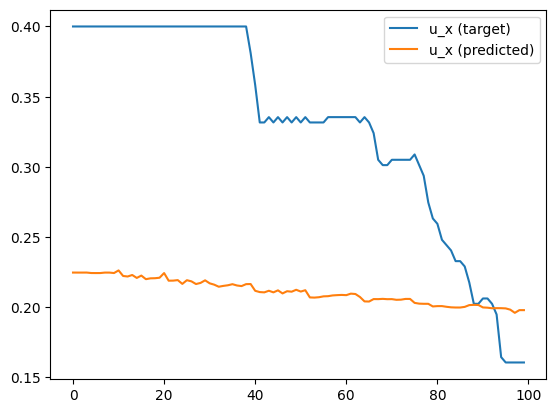

In [19]:
plt.plot(commands['target'], label='u_x (target)')
plt.plot(commands['pred'], label='u_x (predicted)')
plt.legend()